In [1]:
import math
import torch
import GPy
import numpy as np
from matplotlib import pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# GPy.plotting.change_plotting_library('plotly')

In [3]:
def double_sig_model(xi, theta):
    '''Mathematical efinition of the double sigmoid. This is used to generate synthetic data.'''
    a1, a2, a3, a4, a5, a6, a7 = theta[0], theta[1], theta[2], theta[3], theta[4], theta[5], theta[6]
    return a1 + (a2-a1)/(1+math.exp(-a3*(xi-a4))) + (a5-a2)/(1+math.exp(-a6*(xi-a7)))

In [4]:
num_points = 250

theta = np.array([0.0, 0.4, 0.15, 50, 1, 0.293, 150])
x = np.arange(num_points)
f = np.array([double_sig_model(xi, theta) for xi in x])
noise = np.random.normal(loc=0, scale=0.1, size=num_points)
y = f + noise

samples = np.random.permutation(num_points)
train_samples = samples[:int(num_points*.8)]
test_samples = samples[int(num_points*.8):]

# Create training and testing data
train_x, train_y, test_x, test_y = x[train_samples], y[train_samples], x[test_samples], y[test_samples]
train_x, train_y = train_x[train_x.argsort()].reshape(-1, 1), train_y[train_x.argsort()].reshape(-1, 1)
test_x, test_y = test_x[test_x.argsort()].reshape(-1, 1), test_y[test_x.argsort()].reshape(-1, 1)

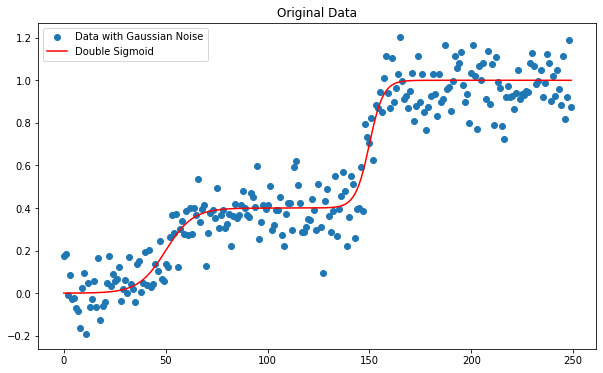

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(x, y, label = 'Data with Gaussian Noise')
plt.plot(f, color = 'red', label = 'Double Sigmoid')
plt.title('Original Data')
plt.legend()
plt.show()

In [12]:
x[125]

125

In [19]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=25)
# y[125:127].reshape(-1,1)
m = GPy.models.GPRegression(train_x,train_y,kernel)

In [20]:
from IPython.display import display
display(m)

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,25.0,+ve,
Gaussian_noise.variance,1.0,+ve,


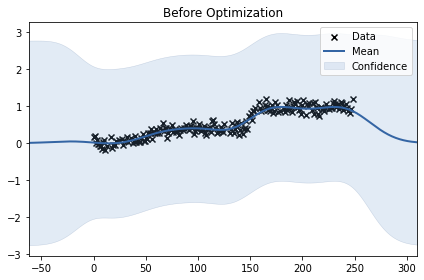

In [22]:
fig = m.plot(title='Before Optimization')

In [23]:
m

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,25.0,+ve,
Gaussian_noise.variance,1.0,+ve,


In [31]:
m.posterior

In [32]:
m.optimize()

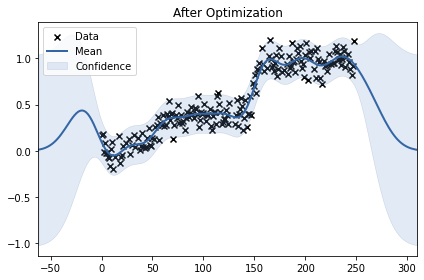

In [33]:
fig = m.plot(title='After Optimization')

In [34]:
m

GP_regression.,value,constraints,priors
rbf.variance,0.26602235498960436,+ve,
rbf.lengthscale,19.502682436144593,+ve,
Gaussian_noise.variance,0.010353250725330602,+ve,


In [38]:
m._param_array_

array([2.66022355e-01, 1.95026824e+01, 1.03532507e-02])